# Exemples avec NLTK pour l'analyse de textes
Ce notebook donne un aperçu rapide de techniques du traitement automatique de la langue naturelle qui peuvent être appliquées en utilisant NLTK pour décortiquer, normaliser et analyser un texte.

Habituellement, un sous-ensemble de ces techniques est utilisé pour construire une application telle qu'un classificateur de texte, un analyseur de sentiments, un système de question-réponse ou un système conversationnel.

Les techniques illustrées sont:

* la segmentation d'un texte en phrases
* la tokénisation de mots, c.-à-d. le découpage d'un texte en jetons (des mots individuels)
* la normalisation d'un mot
* l'analyse grammaticale des mots d'une phrase
* l'analyse syntaxique d'une phrase
* l'extraction d'entités nommées

## Segmentation d'un texte en phrases
Découpe d'un texte anglais (tiré de bulletins de nouvelles de Reuters - voir les corpus disponibles dans NLTK) et, par la suite, le découpage pour un texte français.

In [1]:
from nltk.corpus import reuters
texte_en = reuters.raw('test/21131')[:1150]
print(texte_en)

AMPLE SUPPLIES LIMIT U.S. STRIKE'S OIL PRICE IMPACT
  Ample supplies of OPEC crude weighing on
  world markets helped limit and then reverse oil price gains
  that followed the U.S. Strike on an Iranian oil platform in the
  Gulf earlier on Monday, analysts said.
      December loading rose to 19.65 dlrs, up 45 cents before
  falling to around 19.05/15 later, unchanged from last Friday.
      "Fundamentals are awful," said Philip Lambert, analyst with
  stockbrokers Kleinwort Grieveson, adding that total OPEC
  production in the first week of October could be above 18.5 mln
  bpd, little changed from September levels.
      Peter Nicol, analyst at Chase Manhattan Bank, said OPEC
  production could be about 18.5-19.0 mln in October. Reuter and
  International Energy Agency (IEA) estimates put OPEC September
  production at 18.5 mln bpd.
      The U.S. Attack was in retaliation of last Friday's hit of
  a Kuwaiti oil products tanker flying the U.S. Flag, the Sea
  Isle City. It was struc

In [2]:
import nltk

def segment(text):
    sentences = nltk.sent_tokenize(text)
    print("NOMBRE DE PHRASES: {}\n".format(len(sentences)))
    for sentence in sentences:
        sentence = sentence.replace('\n', '')
        print(" {}\n".format(sentence) )
        
segment(texte_en)

NOMBRE DE PHRASES: 10

 AMPLE SUPPLIES LIMIT U.S. STRIKE'S OIL PRICE IMPACT  Ample supplies of OPEC crude weighing on  world markets helped limit and then reverse oil price gains  that followed the U.S. Strike on an Iranian oil platform in the  Gulf earlier on Monday, analysts said.

 December loading rose to 19.65 dlrs, up 45 cents before  falling to around 19.05/15 later, unchanged from last Friday.

 "Fundamentals are awful," said Philip Lambert, analyst with  stockbrokers Kleinwort Grieveson, adding that total OPEC  production in the first week of October could be above 18.5 mln  bpd, little changed from September levels.

 Peter Nicol, analyst at Chase Manhattan Bank, said OPEC  production could be about 18.5-19.0 mln in October.

 Reuter and  International Energy Agency (IEA) estimates put OPEC September  production at 18.5 mln bpd.

 The U.S.

 Attack was in retaliation of last Friday's hit of  a Kuwaiti oil products tanker flying the U.S.

 Flag, the Sea  Isle City.

 It was st

In [3]:
texte_fr = "J'utilise l'appli ICI TOUT.TV depuis un certain temps pour diffuser vers une Chromecast et ça fonctionne bien 95% du temps. Je dois des fois ouvrir et fermer l'appli à 2 ou 3 reprises pour qu'elle démarre sinon l'écran reste blanc. Et un nouvel irritant vient d'apparaître: ma connexion n'est pas conservée, même après une seule journée."
segment(texte_fr)

NOMBRE DE PHRASES: 3

 J'utilise l'appli ICI TOUT.TV depuis un certain temps pour diffuser vers une Chromecast et ça fonctionne bien 95% du temps.

 Je dois des fois ouvrir et fermer l'appli à 2 ou 3 reprises pour qu'elle démarre sinon l'écran reste blanc.

 Et un nouvel irritant vient d'apparaître: ma connexion n'est pas conservée, même après une seule journée.



## Découpage de phrases en mots


In [4]:
tokens_en = nltk.word_tokenize("The U.S. Army is a good example.")
print(tokens_en)

['The', 'U.S.', 'Army', 'is', 'a', 'good', 'example', '.']


In [5]:
tokens_en = nltk.word_tokenize("December loading rose to 19.65 dlrs, up 45 cents before falling to around 19.05/15 later, unchanged from last Friday.")
print(tokens_en)

['December', 'loading', 'rose', 'to', '19.65', 'dlrs', ',', 'up', '45', 'cents', 'before', 'falling', 'to', 'around', '19.05/15', 'later', ',', 'unchanged', 'from', 'last', 'Friday', '.']


In [6]:
tokens_en = nltk.word_tokenize("Peter Nicol said OPEC production could be about 18.5-19.0 mln in October.")
print(tokens_en)

['Peter', 'Nicol', 'said', 'OPEC', 'production', 'could', 'be', 'about', '18.5-19.0', 'mln', 'in', 'October', '.']


In [7]:
tokens_fr = nltk.word_tokenize("J'utilise l'appli ICI TOUT.TV de Radio-Canada et ça fonctionne bien 95% du temps.")
print(tokens_fr)

["J'utilise", "l'appli", 'ICI', 'TOUT.TV', 'de', 'Radio-Canada', 'et', 'ça', 'fonctionne', 'bien', '95', '%', 'du', 'temps', '.']


# Plusieurs tokeniseurs sont disponibles dans NLTK
Il est important de vérifier les résultats obtenus avec le tokeniseur qu'on utilise car le comportement peut varier beaucoup d'un à l'autre.

In [8]:
from nltk.tokenize import WhitespaceTokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import WordPunctTokenizer


tokenizers = {
    "Whitesp": WhitespaceTokenizer(),
    "Regex": RegexpTokenizer('\w+|\$[\d\.]+|\S+'),
    "Punkt": WordPunctTokenizer(),
    "Tweet": TweetTokenizer()
}

def compare_tok(sentence):
    for name, tokenizer in tokenizers.items():
        tokens = tokenizer.tokenize(sentence)
        reconstructed = " | ".join(tokens)
        print(name, ":  ", reconstructed)

In [9]:
sent_fr = "J'utilise l'appli TOUT.TV de Radio-Canada, ça marche 95% du temps."
compare_tok(sent_fr)

Whitesp :   J'utilise | l'appli | TOUT.TV | de | Radio-Canada, | ça | marche | 95% | du | temps.
Regex :   J | 'utilise | l | 'appli | TOUT | .TV | de | Radio | -Canada, | ça | marche | 95 | % | du | temps | .
Punkt :   J | ' | utilise | l | ' | appli | TOUT | . | TV | de | Radio | - | Canada | , | ça | marche | 95 | % | du | temps | .
Tweet :   J'utilise | l'appli | TOUT.TV | de | Radio-Canada | , | ça | marche | 95 | % | du | temps | .


In [10]:
sent2_fr = "C'est cooool #bonhommesourire: :-) mais #examen  dans <5 semaines =( >:o"
compare_tok(sent2_fr)

Whitesp :   C'est | cooool | #bonhommesourire: | :-) | mais | #examen | dans | <5 | semaines | =( | >:o
Regex :   C | 'est | cooool | #bonhommesourire: | :-) | mais | #examen | dans | <5 | semaines | =( | >:o
Punkt :   C | ' | est | cooool | # | bonhommesourire | : | :-) | mais | # | examen | dans | < | 5 | semaines | =( | >: | o
Tweet :   C'est | cooool | #bonhommesourire | : | :-) | mais | #examen | dans | < | 5 | semaines | =( | > | : | o


# Normalisation de mots
Comparaison du lemmatiseur et des stemmers de NLTK.

In [11]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
word_list = [('haunting', 'n'), ('haunting', 'v'), 
             ('friend', 'n'), ('friends', 'n'), ('friendly', 'a'), 
             ('drink', 'v'), ('drunk', 'v'),
             ('slowly', 'r'), 
             ('xyzing', 'v')
            ]

print("WORD\t\tPOS\tLEMME")
for word, pos in word_list:
    lemmatized = lemmatizer.lemmatize(word, pos)
    print("{}   \t{}\t{}".format(word, pos, lemmatized))

WORD		POS	LEMME
haunting   	n	haunting
haunting   	v	haunt
friend   	n	friend
friends   	n	friend
friendly   	a	friendly
drink   	v	drink
drunk   	v	drink
slowly   	r	slowly
xyzing   	v	xyzing


In [12]:
from nltk.stem import SnowballStemmer
from nltk.stem.snowball import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer

snowball_stemmer = SnowballStemmer('english')
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
word_list = ['haunting','friend', 'friends', 'friendly', 'drink', 'drunk', 'slowly', 'xyzing']

print("WORD\t\tSNOWBALL\tPORTER\t\tLANCASTER")
for word in word_list:
    snbl_stem = snowball_stemmer.stem(word)
    porter_stem = porter_stemmer.stem(word)
    lancaster_stem = lancaster_stemmer.stem(word)
    print("{}   \t{}\t\t{}    \t{}".format(word, snbl_stem, porter_stem, lancaster_stem))

WORD		SNOWBALL	PORTER		LANCASTER
haunting   	haunt		haunt    	haunt
friend   	friend		friend    	friend
friends   	friend		friend    	friend
friendly   	friend		friendli    	friend
drink   	drink		drink    	drink
drunk   	drunk		drunk    	drunk
slowly   	slowli		slowli    	slow
xyzing   	xyze		xyze    	xyz


In [13]:
from nltk.stem.snowball import FrenchStemmer

stemmer = FrenchStemmer()
word_list = ['ami', 'amis', 'mangerais', 'buvions', 'étudié', 'lentement', 'anticonstitutionnellement', 'intergouvernementalisations', 'xyzing']
display([(word, stemmer.stem(word)) for word in word_list])

[('ami', 'ami'),
 ('amis', 'amis'),
 ('mangerais', 'mang'),
 ('buvions', 'buvion'),
 ('étudié', 'étudi'),
 ('lentement', 'lent'),
 ('anticonstitutionnellement', 'anticonstitutionnel'),
 ('intergouvernementalisations', 'intergouvernementalis'),
 ('xyzing', 'xyzing')]

## Analyse grammaticale (part-of-speech tagging)


In [14]:
import nltk

sentence = "You will have to say goodbye to the classic MacBook Pro."
tokens = nltk.word_tokenize(sentence)
tagged_tokens = nltk.pos_tag(tokens)
display(tagged_tokens)

[('You', 'PRP'),
 ('will', 'MD'),
 ('have', 'VB'),
 ('to', 'TO'),
 ('say', 'VB'),
 ('goodbye', 'NN'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('classic', 'JJ'),
 ('MacBook', 'NNP'),
 ('Pro', 'NNP'),
 ('.', '.')]

# Analyse syntaxique


In [15]:
groucho_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
 """)

In [16]:
sentence = "I shot an elephant in my pajamas"
sent_tok = nltk.word_tokenize(sentence)
parser = nltk.ChartParser(groucho_grammar)
for tree in parser.parse(sent_tok):
    print(tree)

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


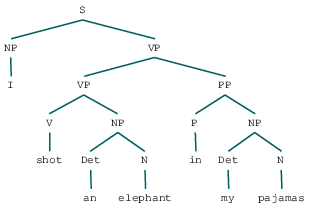

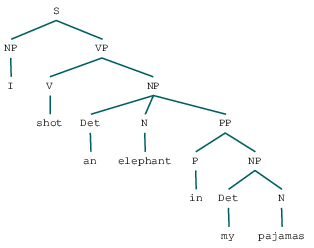

In [17]:
for tree in parser.parse(sent_tok):
    display(tree)

# Reconnaissance d'entités nommées (named entity recognition)


In [18]:
import nltk

sentence = "The closing chapter, is adapted from the address that Feynman gave at the California Institute Of Technology. "

tokens = nltk.word_tokenize(sentence)
tagged_tokens = nltk.pos_tag(tokens)
ner_annotated_tree = nltk.ne_chunk(tagged_tokens)
print(ner_annotated_tree)

(S
  The/DT
  closing/NN
  chapter/NN
  ,/,
  is/VBZ
  adapted/VBN
  from/IN
  the/DT
  address/NN
  that/IN
  (PERSON Feynman/NNP)
  gave/VBD
  at/IN
  the/DT
  (ORGANIZATION California/NNP Institute/NNP Of/IN Technology/NNP)
  ./.)


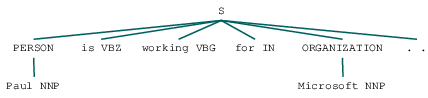

In [19]:
import nltk

sentence = "Paul is working for Microsoft."
tokens = nltk.word_tokenize(sentence)
tagged_tokens = nltk.pos_tag(tokens)
ner_annotated_tree = nltk.ne_chunk(tagged_tokens)
display(ner_annotated_tree)